In [341]:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

# import packages for analysis and modeling
import pandas as pd  # data frame operations
from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
from pandas import Series
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
from matplotlib import pyplot


from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import matplotlib.pyplot as plt  # 2D plotting

In [342]:
# read in the zip code data
zipcode = pd.read_csv("Zip_Zhvi_SingleFamilyResidence.csv")
#zipcode = Series.from_csv('Zip_Zhvi_SingleFamilyResidence.csv', header=0)

#remove RegionID column
zipcode = zipcode.drop('RegionID', 1)

print(zipcode.shape)  # check the structure of the data frame
print(zipcode.head())

(14602, 270)
   RegionName      City State     Metro CountyName  SizeRank   1996-04  \
0       60657   Chicago    IL   Chicago       Cook         1       NaN   
1       60614   Chicago    IL   Chicago       Cook         2  505524.0   
2       79936   El Paso    TX   El Paso    El Paso         3   77431.0   
3       10467  New York    NY  New York      Bronx         4  150963.0   
4       60640   Chicago    IL   Chicago       Cook         5  222514.0   

    1996-05   1996-06   1996-07   ...     2017-06  2017-07  2017-08  2017-09  \
0       NaN       NaN       NaN   ...     1001277  1006413  1007783  1008123   
1  512639.0  517944.0  521358.0   ...     1284983  1284716  1283827  1284993   
2   77416.0   77471.0   77461.0   ...      119197   119425   119669   120101   
3  150790.0  151051.0  151187.0   ...      393199   396210   402164   409910   
4  224079.0  223847.0  222897.0   ...      794925   796578   784977   774269   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  
0  

In [343]:
zipcode.head()

RegionName      City State     Metro CountyName  SizeRank   1996-04  \
0       60657   Chicago    IL   Chicago       Cook         1       NaN   
1       60614   Chicago    IL   Chicago       Cook         2  505524.0   
2       79936   El Paso    TX   El Paso    El Paso         3   77431.0   
3       10467  New York    NY  New York      Bronx         4  150963.0   
4       60640   Chicago    IL   Chicago       Cook         5  222514.0   

    1996-05   1996-06   1996-07   ...     2017-06  2017-07  2017-08  2017-09  \
0       NaN       NaN       NaN   ...     1001277  1006413  1007783  1008123   
1  512639.0  517944.0  521358.0   ...     1284983  1284716  1283827  1284993   
2   77416.0   77471.0   77461.0   ...      119197   119425   119669   120101   
3  150790.0  151051.0  151187.0   ...      393199   396210   402164   409910   
4  224079.0  223847.0  222897.0   ...      794925   796578   784977   774269   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  
0  1011378  1015342  1019834  1026241  1031883  1034889  
1  1289789  1295372  1297104  1307931  1328757  1346435  
2   120535   120782   120764   120573   120481   120491  
3   414210   415763   416274   416691   417375   419670  
4   773541   777399   777859   779771   786038   792338  

[5 rows x 270 columns]

In [344]:
zipcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14602 entries, 0 to 14601
Columns: 270 entries, RegionName to 2018-03
dtypes: float64(213), int64(53), object(4)
memory usage: 30.1+ MB


In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
zipcode.boxplot(column=['Metro'], by='Name', ax=ax)

<function matplotlib.pyplot.show>

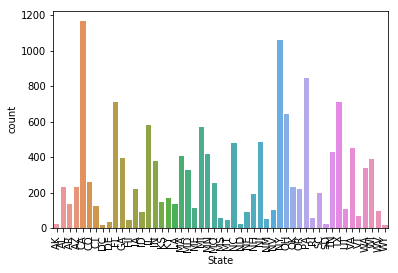

In [379]:
#alphabetical order
g = sns.countplot(x="State", data=zipcode.sort_values('State'))
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show>

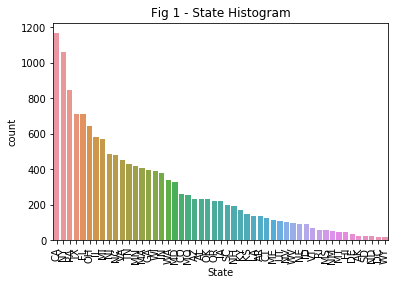

In [426]:
g = sns.countplot(x="State", data=zipcode, order = zipcode['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Fig 1 - State Histogram")
plt.show

In [424]:
zipcode[zipcode.State == 'WY']

RegionName         City State     Metro CountyName  SizeRank  1996-04  \
1535        82001     Cheyenne    WY  Cheyenne    Laramie      1536      NaN   
2072        82009     Cheyenne    WY  Cheyenne    Laramie      2073      NaN   
3377        82601       Casper    WY    Casper    Natrona      3378      NaN   
3900        82604       Casper    WY    Casper    Natrona      3901      NaN   
5081        82070      Laramie    WY   Laramie     Albany      5082      NaN   
5164        82007     Cheyenne    WY  Cheyenne    Laramie      5165      NaN   
5193        82609       Casper    WY    Casper    Natrona      5194      NaN   
5243        82501     Riverton    WY  Riverton    Fremont      5244      NaN   
5823        82072      Laramie    WY   Laramie     Albany      5824      NaN   
7253        82520       Lander    WY  Riverton    Fremont      7254      NaN   
7316        82930     Evanston    WY  Evanston      Uinta      7317      NaN   
10473       82636   Evansville    WY    Casper    Natrona     10474      NaN   
12342       82937        Lyman    WY  Evanston      Uinta     12343      NaN   
12566       82513       Dubois    WY  Riverton    Fremont     12567      NaN   
13224       82225         Lusk    WY       NaN   Niobrara     13225      NaN   
13668       82082  Pine Bluffs    WY  Cheyenne    Laramie     13669      NaN   

       1996-05  1996-06  1996-07   ...     2017-06  2017-07  2017-08  2017-09  \
1535       NaN      NaN      NaN   ...      200424   200224   200992   202232   
2072       NaN      NaN      NaN   ...      299646   300782   303743   305591   
3377       NaN      NaN      NaN   ...      184316   184276   184477   184717   
3900       NaN      NaN      NaN   ...      199455   199341   199057   198770   
5081       NaN      NaN      NaN   ...      221344   221916   222885   224302   
5164       NaN      NaN      NaN   ...      174135   173666   173770   174774   
5193       NaN      NaN      NaN   ...      232892   232351   232401   232695   
5243       NaN      NaN      NaN   ...      183282   184005   185507   186663   
5823       NaN      NaN      NaN   ...      216984   217943   219185   220394   
7253       NaN      NaN      NaN   ...      218708   219280   220165   220756   
7316       NaN      NaN      NaN   ...      198234   197916   197717   197744   
10473      NaN      NaN      NaN   ...      211337   211106   211377   211415   
12342      NaN      NaN      NaN   ...      214711   213717   214258   215039   
12566      NaN      NaN      NaN   ...      224669   225010   225476   225827   
13224      NaN      NaN      NaN   ...      125405   125616   125206   124821   
13668      NaN      NaN      NaN   ...      155915   158490   165761   173391   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  
1535    203069   203986   204882   205670   206149   206384  
2072    306088   306936   307785   310194   312882   314410  
3377    185439   186588   187542   188446   189883   191172  
3900    199352   200603   201737   202531   203549   204502  
5081    223078   219909   218359   219359   220136   220590  
5164    175721   176333   176942   177998   179332   180386  
5193    233987   236185   237952   239191   240937   242358  
5243    188514   191213   193287   193587   194051   194689  
5823    221005   221240   221285   221436   221629   221761  
7253    221614   222949   224040   225450   227677   229601  
7316    197842   197924   198194   198725   199543   200183  
10473   213298   216017   216606   215918   217685   219502  
12342   215308   215385   215555   215531   215557   215522  
12566   225890   226069   226602   227480   228942   230531  
13224   124779   125605   127485   129706   131399   132683  
13668   177419   179885   182815   186621   188847   189818  

[16 rows x 270 columns]

In [419]:
arMetro = zipcode[zipcode.Metro.isin(['Hot Springs','Little Rock','Fayetteville','Searcy']) & (zipcode.State == 'AR')]


<function matplotlib.pyplot.show>

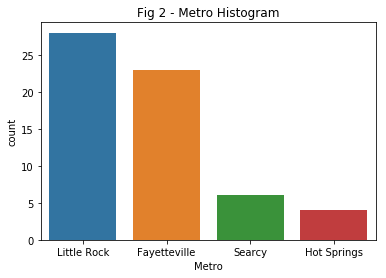

In [437]:
g = sns.countplot(x="Metro", data=arMetro,order = arMetro['Metro'].value_counts().index)
plt.xticks(rotation=0)
plt.title("Fig 2 - Metro Histogram")
plt.show

In [360]:
#mean for the hot springs area, use on un-transposed data
hotMean = zipcode[zipcode.Metro == 'Hot Springs'].groupby(['Metro']).mean()
#takes only years 1997 to 2013, later take the first three months of 2014
#extend the range to include 2014-04 for the model forecast
hotMean = hotMean.loc[:, '1997-01' : '2014-04']
#hotMean = hotMean.loc[:, '2014-01' : '2014-03']
hotMean

1997-01       1997-02  1997-03  1997-04       1997-05  \
Metro                                                                     
Hot Springs  73910.666667  72628.333333  71416.0  71348.0  72346.666667   

             1997-06       1997-07  1997-08  1997-09       1997-10    ...     \
Metro                                                                 ...      
Hot Springs  73401.0  74364.666667  75072.0  75085.0  74856.666667    ...      

               2013-07    2013-08    2013-09    2013-10    2013-11   2013-12  \
Metro                                                                          
Hot Springs  129797.75  129774.75  129680.25  129307.75  128823.25  128364.0   

               2014-01   2014-02    2014-03   2014-04  
Metro                                                  
Hot Springs  128247.75  128543.0  128325.75  126936.5  

[1 rows x 208 columns]

In [51]:
#mean for the little rock area, use on un-transposed data
rockMean = zipcode[zipcode.Metro == 'Little Rock'].groupby(['Metro']).mean()
#takes only years 1997 to 2013
rockMean = rockMean.loc[:, '1997-01' : '2014-04']
rockMean

1997-01  1997-02       1997-03       1997-04       1997-05  \
Metro                                                                          
Little Rock  87425.045455  87819.0  88372.181818  88920.545455  89335.045455   

                  1997-06  1997-07       1997-08  1997-09       1997-10  \
Metro                                                                     
Little Rock  89540.363636  89705.5  90028.590909  90472.5  91010.090909   

               ...            2013-07        2013-08   2013-09        2013-10  \
Metro          ...                                                              
Little Rock    ...      132442.178571  132936.535714  133498.5  133855.428571   

                   2013-11        2013-12        2014-01        2014-02  \
Metro                                                                     
Little Rock  134007.571429  134015.678571  134093.571429  134265.392857   

                   2014-03    2014-04  
Metro                                  
Little Rock  134335.607143  134278.75  

[1 rows x 208 columns]

In [52]:
#mean for the fayetteville area, use on un-transposed data
fayMean = zipcode[zipcode.Metro == 'Fayetteville'].groupby(['Metro']).mean()
#takes only years 1997 to 2013
fayMean = fayMean.loc[:, '1997-01' : '2014-04']
fayMean

1997-01   1997-02     1997-03     1997-04     1997-05  \
Metro                                                                   
Fayetteville  84519.125  84784.75  85503.9375  86451.5625  86647.6875   

               1997-06       1997-07       1997-08       1997-09  \
Metro                                                              
Fayetteville  85801.25  86572.263158  85731.368421  85025.789474   

                   1997-10      ...              2013-07        2013-08  \
Metro                           ...                                       
Fayetteville  84703.526316      ...        121646.352941  122118.911765   

                    2013-09        2013-10        2013-11        2013-12  \
Metro                                                                      
Fayetteville  122657.382353  123317.705882  123967.823529  124532.735294   

                    2014-01        2014-02        2014-03        2014-04  
Metro                                                                     
Fayetteville  124835.794118  124826.823529  124907.441176  125277.705882  

[1 rows x 208 columns]

In [69]:
#mean for the searcy area, use on un-transposed data
#searcyMean = zipcode[zipcode.Metro == 'Searcy'].groupby(['Metro']).mean()
searcyMean = zipcode[(zipcode.Metro == 'Searcy') & (zipcode.State == 'AR')].groupby(['Metro']).mean()
#takes only years 1997 to 2013
searcyMean = searcyMean.loc[:, '1997-01' : '2014-04']
searcyMean

1997-01  1997-02  1997-03  1997-04  1997-05  1997-06  1997-07  \
Metro                                                                   
Searcy  56226.4  56392.0  56598.4  56860.0  57124.4  57423.6  57753.4   

        1997-08  1997-09  1997-10      ...            2013-07       2013-08  \
Metro                                  ...                                    
Searcy  58082.0  58503.0  59044.0      ...       88321.333333  88656.166667   

             2013-09       2013-10       2013-11  2013-12       2014-01  \
Metro                                                                     
Searcy  89275.166667  89818.333333  90091.833333  89995.0  90082.166667   

        2014-02       2014-03       2014-04  
Metro                                        
Searcy  90841.5  91355.833333  90845.666667  

[1 rows x 208 columns]

In [70]:
#turn the dataframe into a series, no transposing
#https://stackoverflow.com/questions/33246771/convert-pandas-data-frame-to-series
#hotSeries = hotMean.iloc[0]
#hotSeries.head()

In [71]:
#transpose the means of the hot springs area
hotMeanT = hotMean.T.copy()
hotMeanT = hotMeanT.reset_index()
hotMeanT = hotMeanT.rename(columns={'index':'Date'})
hotMeanT['Date'] = pd.to_datetime(hotMeanT['Date'])
hotMeanT.head()

Metro       Date   Hot Springs
0     1997-01-01  73910.666667
1     1997-02-01  72628.333333
2     1997-03-01  71416.000000
3     1997-04-01  71348.000000
4     1997-05-01  72346.666667

In [72]:
#transpose the means of the little rock area
rockMeanT = rockMean.T.copy()
rockMeanT = rockMeanT.reset_index()
rockMeanT = rockMeanT.rename(columns={'index':'Date'})
rockMeanT['Date'] = pd.to_datetime(rockMeanT['Date'])
rockMeanT.head()

Metro       Date   Little Rock
0     1997-01-01  87425.045455
1     1997-02-01  87819.000000
2     1997-03-01  88372.181818
3     1997-04-01  88920.545455
4     1997-05-01  89335.045455

In [73]:
#transpose the means of the fayetteville area
fayMeanT = fayMean.T.copy()
fayMeanT = fayMeanT.reset_index()
fayMeanT = fayMeanT.rename(columns={'index':'Date'})
fayMeanT['Date'] = pd.to_datetime(fayMeanT['Date'])
fayMeanT.head()

Metro       Date  Fayetteville
0     1997-01-01    84519.1250
1     1997-02-01    84784.7500
2     1997-03-01    85503.9375
3     1997-04-01    86451.5625
4     1997-05-01    86647.6875

In [74]:
#transpose the means of the hot springs area
searcyMeanT = searcyMean.T.copy()
searcyMeanT = searcyMeanT.reset_index()
searcyMeanT = searcyMeanT.rename(columns={'index':'Date'})
searcyMeanT['Date'] = pd.to_datetime(searcyMeanT['Date'])
searcyMeanT.head()

Metro       Date   Searcy
0     1997-01-01  56226.4
1     1997-02-01  56392.0
2     1997-03-01  56598.4
3     1997-04-01  56860.0
4     1997-05-01  57124.4

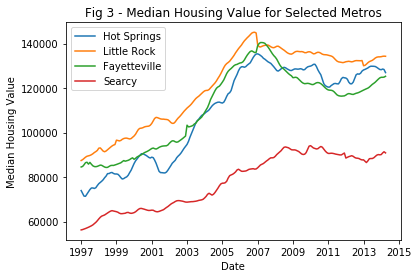

In [438]:
#searcy positive slope (all do)
#other lines have a rise/fall
#blue - more up/down (variability) - riskier, can double money
#1997-2014 searcy has 20K increase in median housing price
#avg growth, avg variability, variability at interval (monthly/yearly)

plt.figure()

x = hotMeanT['Date']
y1 = hotMeanT['Hot Springs']
y2 = rockMeanT['Little Rock']
y3 = fayMeanT['Fayetteville']
y4 = searcyMeanT['Searcy']

plt.plot(x,y1,label='Hot Springs')
plt.plot(x,y2,label='Little Rock')
plt.plot(x,y3,label='Fayetteville')
plt.plot(x,y4,label='Searcy')

plt.title("Fig 3 - Median Housing Value for Selected Metros")
plt.xlabel("Date")
plt.ylabel("Median Housing Value")
plt.legend(loc='upper left')
plt.show()

#ARIMA can predict with x accuracy
#what does the accuracy tell you
#lesson 5 - risk level for investment recommendation (recommend based on risk level)
#little rock - risky
#searcy - less return, less variability

In [11]:
#create a time series using the means of the hot springs area
hotSeries = pd.Series(hotMeanT["Hot Springs"].values, index=hotMeanT['Date'])
hotSeries.head()

Date
1997-01-01    73910.666667
1997-02-01    72628.333333
1997-03-01    71416.000000
1997-04-01    71348.000000
1997-05-01    72346.666667
dtype: float64

In [84]:
#create a time series using the means of the hot springs area
rockSeries = pd.Series(rockMeanT["Little Rock"].values, index=rockMeanT['Date'])
rockSeries.head()

Date
1997-01-01    87425.045455
1997-02-01    87819.000000
1997-03-01    88372.181818
1997-04-01    88920.545455
1997-05-01    89335.045455
dtype: float64

In [85]:
#create a time series using the means of the hot springs area
faySeries = pd.Series(fayMeanT["Fayetteville"].values, index=fayMeanT['Date'])
faySeries.head()

Date
1997-01-01    84519.1250
1997-02-01    84784.7500
1997-03-01    85503.9375
1997-04-01    86451.5625
1997-05-01    86647.6875
dtype: float64

In [86]:
#create a time series using the means of the hot springs area
searcySeries = pd.Series(searcyMeanT["Searcy"].values, index=searcyMeanT['Date'])
searcySeries.head()

Date
1997-01-01    56226.4
1997-02-01    56392.0
1997-03-01    56598.4
1997-04-01    56860.0
1997-05-01    57124.4
dtype: float64

In [12]:
#growth - percent change from 1997 to 2013
(hotSeries['2013-12-01'] - hotSeries['1997-01-01']) / hotSeries['1997-01-01']

0.7367452600436561

In [87]:
#growth - percent change from 1997 to 2013
(rockSeries['2013-12-01'] - rockSeries['1997-01-01']) / rockSeries['1997-01-01']

0.5329208909717617

In [88]:
#growth - percent change from 1997 to 2013
(faySeries['2013-12-01'] - faySeries['1997-01-01']) / faySeries['1997-01-01']

0.47342669832558787

In [89]:
#growth - percent change from 1997 to 2013
(searcySeries['2013-12-01'] - searcySeries['1997-01-01']) / searcySeries['1997-01-01']

0.6005826444517166

In [439]:
#growth - percent change from 1997 to 2013
print((hotSeries['2013-12-01'] - hotSeries['1997-01-01']) / hotSeries['1997-01-01'])
print((rockSeries['2013-12-01'] - rockSeries['1997-01-01']) / rockSeries['1997-01-01'])
print((faySeries['2013-12-01'] - faySeries['1997-01-01']) / faySeries['1997-01-01'])
print((searcySeries['2013-12-01'] - searcySeries['1997-01-01']) / searcySeries['1997-01-01'])

0.7367452600436561
0.5329208909717617
0.47342669832558787
0.6005826444517166


In [440]:
#growth - difference from 1997 to 2013
print((hotSeries['2013-12-01'] - hotSeries['1997-01-01']))
print((rockSeries['2013-12-01'] - rockSeries['1997-01-01']))
print((faySeries['2013-12-01'] - faySeries['1997-01-01']))
print((searcySeries['2013-12-01'] - searcySeries['1997-01-01']))

54453.33333333333
46590.633116883124
40013.61029411765
33768.6


In [13]:
hotSeries['2013-12-01']

128364.0

In [14]:
hotSeries['1997-01-01']

73910.66666666667

In [15]:
hotSeries.index

DatetimeIndex(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01',
               ...
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01'],
              dtype='datetime64[ns]', name='Date', length=208, freq=None)

In [16]:
#turn the index into datetime
#https://stackoverflow.com/questions/13654699/reindexing-pandas-timeseries-from-object-dtype-to-datetime-dtype
#hotSeries.index = pd.to_datetime(hotSeries.index)
#hotSeries.index

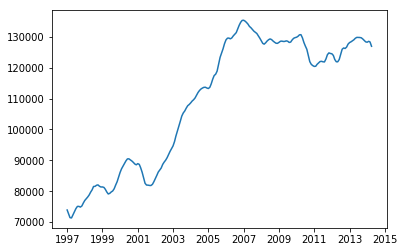

In [17]:
plt.plot(hotSeries)

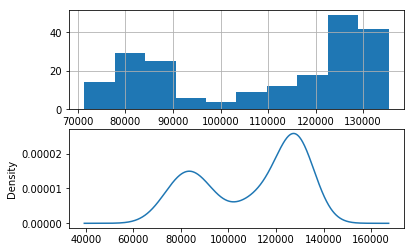

In [18]:
pyplot.figure(1)
pyplot.subplot(211)
hotSeries.hist()
pyplot.subplot(212)
hotSeries.plot(kind='kde')
pyplot.show()

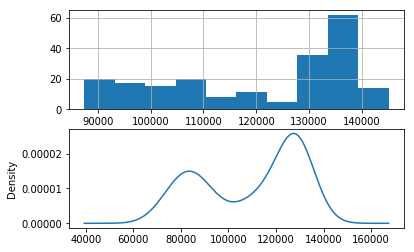

In [90]:
pyplot.figure(1)
pyplot.subplot(211)
rockSeries.hist()
pyplot.subplot(212)
rockSeries.plot(kind='kde')
pyplot.show()

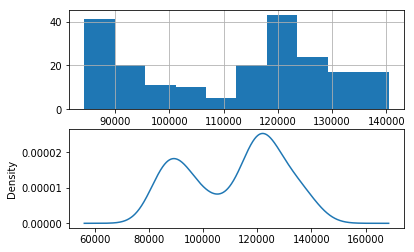

In [93]:
pyplot.figure(1)
pyplot.subplot(211)
faySeries.hist()
pyplot.subplot(212)
faySeries.plot(kind='kde')
pyplot.show()

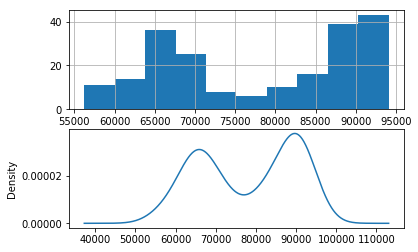

In [94]:
pyplot.figure(1)
pyplot.subplot(211)
searcySeries.hist()
pyplot.subplot(212)
searcySeries.plot(kind='kde')
pyplot.show()

ADF Statistic: -2.427190
p-value: 0.134209
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


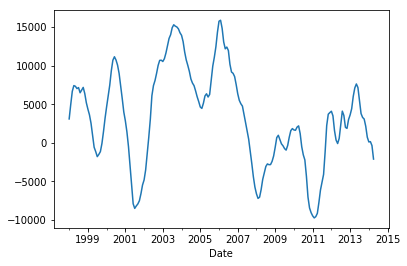

In [19]:
from statsmodels.tsa.stattools import adfuller
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

X = hotSeries.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = hotSeries.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
#stationary.to_csv('stationary.csv')
# plot
stationary.plot()
pyplot.show()

In [20]:
hotSeries.head()

Date
1997-01-01    73910.666667
1997-02-01    72628.333333
1997-03-01    71416.000000
1997-04-01    71348.000000
1997-05-01    72346.666667
dtype: float64

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

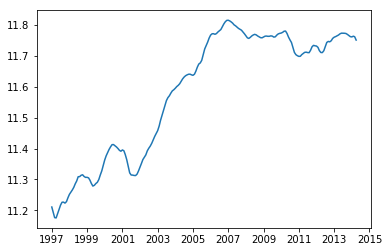

In [22]:
#One of the first tricks to reduce trend can be transformation. 
#For example, in this case we can clearly see that the there is a significant positive trend. 
#So we can apply transformation which penalize higher values more than smaller values. 
hotSeriesLog = np.log(hotSeries)
plt.plot(hotSeriesLog)

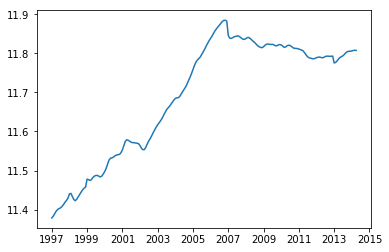

In [106]:
rockSeriesLog = np.log(rockSeries)
plt.plot(rockSeriesLog)

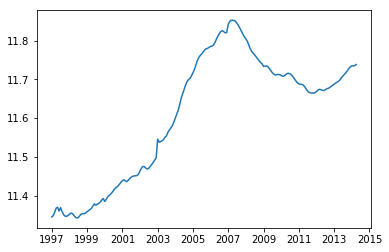

In [107]:
faySeriesLog = np.log(faySeries)
plt.plot(faySeriesLog)

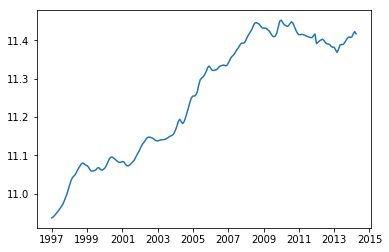

In [108]:
searcySeriesLog = np.log(searcySeries)
plt.plot(searcySeriesLog)

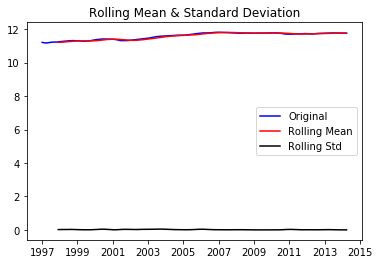

Results of Dickey-Fuller Test:
Test Statistic                  -1.750897
p-value                          0.405098
#Lags Used                       4.000000
Number of Observations Used    203.000000
Critical Value (1%)             -3.462980
Critical Value (5%)             -2.875885
Critical Value (10%)            -2.574416
dtype: float64


In [43]:
test_stationarity(hotSeriesLog)

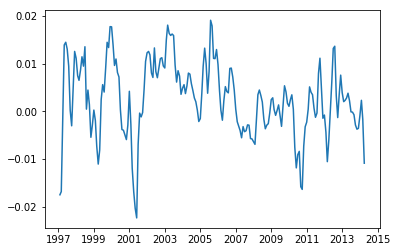

In [23]:
hotSeriesLog_diff = hotSeriesLog - hotSeriesLog.shift()
plt.plot(hotSeriesLog_diff)

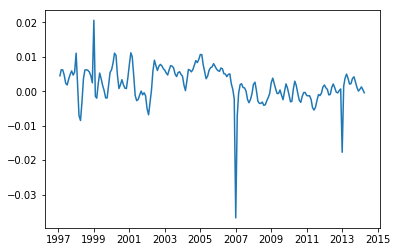

In [109]:
rockSeriesLog_diff = rockSeriesLog - rockSeriesLog.shift()
plt.plot(rockSeriesLog_diff)

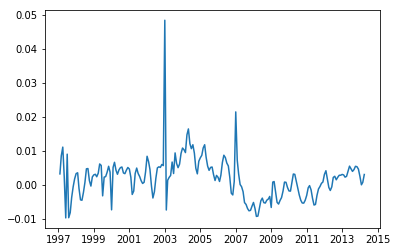

In [110]:
faySeriesLog_diff = faySeriesLog - faySeriesLog.shift()
plt.plot(faySeriesLog_diff)

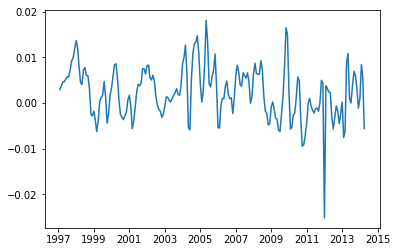

In [111]:
searcySeriesLog_diff = searcySeriesLog - searcySeriesLog.shift()
plt.plot(searcySeriesLog_diff)

C:\Users\johnc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\johnc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


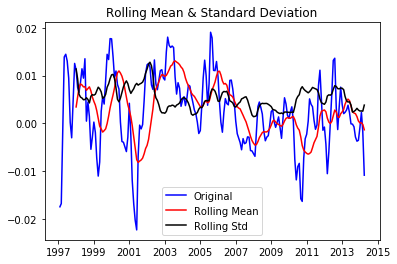

Results of Dickey-Fuller Test:
Test Statistic                  -4.217859
p-value                          0.000615
#Lags Used                       3.000000
Number of Observations Used    203.000000
Critical Value (1%)             -3.462980
Critical Value (5%)             -2.875885
Critical Value (10%)            -2.574416
dtype: float64


In [25]:
hotSeriesLog_diff.dropna(inplace=True)
test_stationarity(hotSeriesLog_diff)


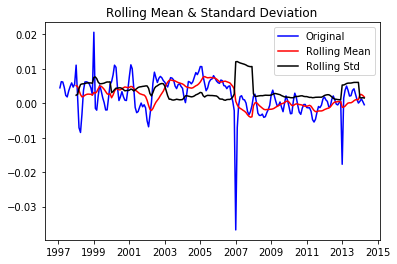

Results of Dickey-Fuller Test:
Test Statistic                -7.284591e+00
p-value                        1.470117e-10
#Lags Used                     0.000000e+00
Number of Observations Used    2.060000e+02
Critical Value (1%)           -3.462499e+00
Critical Value (5%)           -2.875675e+00
Critical Value (10%)          -2.574304e+00
dtype: float64


In [114]:
rockSeriesLog_diff.dropna(inplace=True)
test_stationarity(rockSeriesLog_diff)

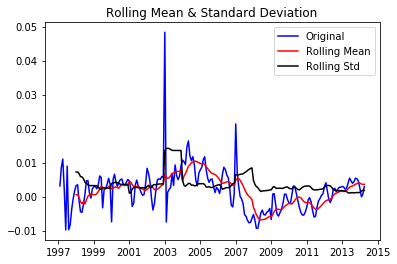

Results of Dickey-Fuller Test:
Test Statistic                  -3.317051
p-value                          0.014133
#Lags Used                       4.000000
Number of Observations Used    202.000000
Critical Value (1%)             -3.463144
Critical Value (5%)             -2.875957
Critical Value (10%)            -2.574455
dtype: float64


In [115]:
faySeriesLog_diff.dropna(inplace=True)
test_stationarity(faySeriesLog_diff)

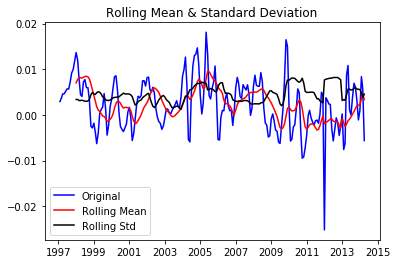

Results of Dickey-Fuller Test:
Test Statistic                -7.376501e+00
p-value                        8.694455e-11
#Lags Used                     1.000000e+00
Number of Observations Used    2.050000e+02
Critical Value (1%)           -3.462658e+00
Critical Value (5%)           -2.875744e+00
Critical Value (10%)          -2.574341e+00
dtype: float64


In [116]:
searcySeriesLog_diff.dropna(inplace=True)
test_stationarity(searcySeriesLog_diff)

In [2]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

C:\Users\johnc\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Text(0.5,1,'Hot Springs Autocorrelation Function')

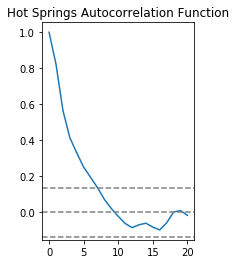

In [441]:
lag_acf = acf(hotSeriesLog_diff, nlags=20)
lag_pacf = pacf(hotSeriesLog_diff, nlags=20, method='ols')#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(hotSeriesLog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(hotSeriesLog_diff)),linestyle='--',color='gray')
plt.title('Hot Springs Autocorrelation Function')

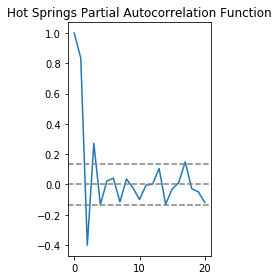

In [442]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(hotSeriesLog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(hotSeriesLog_diff)),linestyle='--',color='gray')
plt.title('Hot Springs Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5,1,'Little Rock Autocorrelation Function')

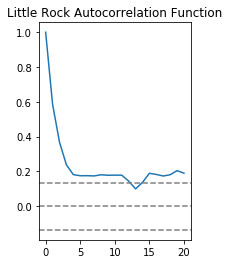

In [443]:
lag_acf = acf(rockSeriesLog_diff, nlags=20)
lag_pacf = pacf(rockSeriesLog_diff, nlags=20, method='ols')#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(rockSeriesLog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(rockSeriesLog_diff)),linestyle='--',color='gray')
plt.title('Little Rock Autocorrelation Function')

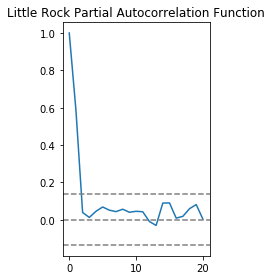

In [444]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(rockSeriesLog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(rockSeriesLog_diff)),linestyle='--',color='gray')
plt.title('Little Rock Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5,1,'Fayetteville Autocorrelation Function')

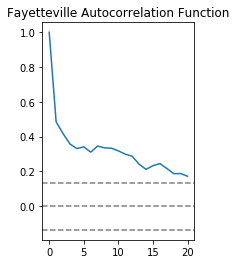

In [445]:
lag_acf = acf(faySeriesLog_diff, nlags=20)
lag_pacf = pacf(faySeriesLog_diff, nlags=20, method='ols')#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(faySeriesLog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(faySeriesLog_diff)),linestyle='--',color='gray')
plt.title('Fayetteville Autocorrelation Function')

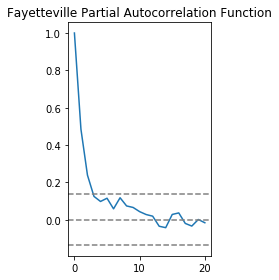

In [446]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(faySeriesLog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(faySeriesLog_diff)),linestyle='--',color='gray')
plt.title('Fayetteville Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5,1,'Searcy Autocorrelation Function')

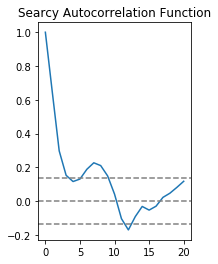

In [447]:
lag_acf = acf(searcySeriesLog_diff, nlags=20)
lag_pacf = pacf(searcySeriesLog_diff, nlags=20, method='ols')#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(searcySeriesLog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(searcySeriesLog_diff)),linestyle='--',color='gray')
plt.title('Searcy Autocorrelation Function')

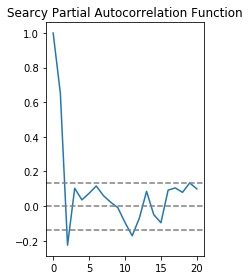

In [448]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(searcySeriesLog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(searcySeriesLog_diff)),linestyle='--',color='gray')
plt.title('Searcy Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5,1,' Hot Springs RSS: 0.0030')

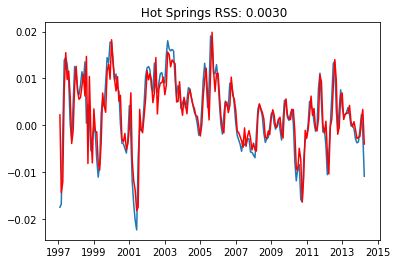

In [452]:
#hot springs model
Hmodel = ARIMA(hotSeriesLog, order=(2, 1, 2))  
Hresults_ARIMA = model.fit(disp=-1)  
plt.plot(hotSeriesLog_diff)
plt.plot(Hresults_ARIMA.fittedvalues, color='red')
plt.title(' Hot Springs RSS: %.4f'% sum((Hresults_ARIMA.fittedvalues-hotSeriesLog_diff)**2))

Text(0.5,1,'Little Rock RSS: 0.0036')

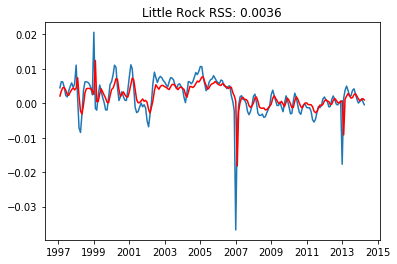

In [453]:
Rmodel = ARIMA(rockSeriesLog, order=(2, 1, 2))  
Rresults_ARIMA = Rmodel.fit(disp=-1)  
plt.plot(rockSeriesLog_diff)
plt.plot(Rresults_ARIMA.fittedvalues, color='red')
plt.title('Little Rock RSS: %.4f'% sum((Rresults_ARIMA.fittedvalues-rockSeriesLog_diff)**2))

Text(0.5,1,'Fayetteville RSS: 0.0053')

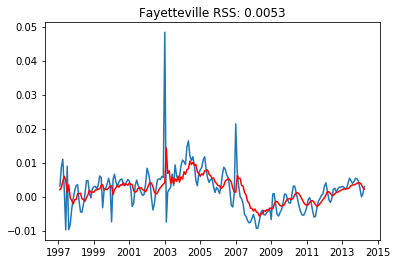

In [454]:
Fmodel = ARIMA(faySeriesLog, order=(2, 1, 2))
Fresults_ARIMA = Fmodel.fit(disp=-1)
plt.plot(faySeriesLog_diff)
plt.plot(Fresults_ARIMA.fittedvalues, color='red')
plt.title('Fayetteville RSS: %.4f'% sum((Fresults_ARIMA.fittedvalues-faySeriesLog_diff)**2))

Text(0.5,1,'Searcy RSS: 0.0035')

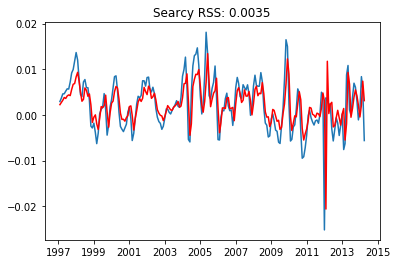

In [451]:
Smodel = ARIMA(searcySeriesLog, order=(2, 1, 2))  
Sresults_ARIMA = Smodel.fit(disp=-1)  
plt.plot(searcySeriesLog_diff)
plt.plot(Sresults_ARIMA.fittedvalues, color='red')
plt.title('Searcy RSS: %.4f'% sum((Sresults_ARIMA.fittedvalues-searcySeriesLog_diff)**2))

In [32]:
#template
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1997-02-01    0.002210
1997-03-01   -0.014382
1997-04-01   -0.012119
1997-05-01    0.007687
1997-06-01    0.015507
dtype: float64


In [140]:
#hot
Hpredictions_ARIMA_diff = pd.Series(Hresults_ARIMA.fittedvalues, copy=True)
print(Hpredictions_ARIMA_diff.head())

Date
1997-02-01    0.002210
1997-03-01   -0.014382
1997-04-01   -0.012119
1997-05-01    0.007687
1997-06-01    0.015507
dtype: float64


In [141]:
#rock
Rpredictions_ARIMA_diff = pd.Series(Rresults_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1997-02-01    0.002210
1997-03-01   -0.014382
1997-04-01   -0.012119
1997-05-01    0.007687
1997-06-01    0.015507
dtype: float64


In [142]:
#fay
Fpredictions_ARIMA_diff = pd.Series(Fresults_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1997-02-01    0.002210
1997-03-01   -0.014382
1997-04-01   -0.012119
1997-05-01    0.007687
1997-06-01    0.015507
dtype: float64


In [143]:
#searcy
Spredictions_ARIMA_diff = pd.Series(Sresults_ARIMA.fittedvalues, copy=True)
print(Spredictions_ARIMA_diff.head())

Date
1997-02-01    0.002261
1997-03-01    0.002703
1997-04-01    0.003219
1997-05-01    0.003829
1997-06-01    0.003623
dtype: float64


In [34]:
#template
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1997-02-01    0.002210
1997-03-01   -0.012172
1997-04-01   -0.024291
1997-05-01   -0.016603
1997-06-01   -0.001097
dtype: float64


In [145]:
#hot
Hpredictions_ARIMA_diff_cumsum = Hpredictions_ARIMA_diff.cumsum()
print(Hpredictions_ARIMA_diff_cumsum.head())

Date
1997-02-01    0.002210
1997-03-01   -0.012172
1997-04-01   -0.024291
1997-05-01   -0.016603
1997-06-01   -0.001097
dtype: float64


In [146]:
#rock
Rpredictions_ARIMA_diff_cumsum = Rpredictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1997-02-01    0.002210
1997-03-01   -0.012172
1997-04-01   -0.024291
1997-05-01   -0.016603
1997-06-01   -0.001097
dtype: float64


In [147]:
#fay
Fpredictions_ARIMA_diff_cumsum = Fpredictions_ARIMA_diff.cumsum()
print(Fpredictions_ARIMA_diff_cumsum.head())

Date
1997-02-01    0.002020
1997-03-01    0.004533
1997-04-01    0.008961
1997-05-01    0.014918
1997-06-01    0.019679
dtype: float64


In [148]:
#searcy
Spredictions_ARIMA_diff_cumsum = Spredictions_ARIMA_diff.cumsum()
print(Spredictions_ARIMA_diff_cumsum.head())

Date
1997-02-01    0.002261
1997-03-01    0.004964
1997-04-01    0.008183
1997-05-01    0.012012
1997-06-01    0.015635
dtype: float64


In [36]:
#template
predictions_ARIMA_log = pd.Series(hotSeriesLog.ix[0], index=hotSeriesLog.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\johnc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
1997-01-01    11.210612
1997-02-01    11.212823
1997-03-01    11.198441
1997-04-01    11.186322
1997-05-01    11.194009
dtype: float64

In [149]:
#hot
Hpredictions_ARIMA_log = pd.Series(hotSeriesLog.ix[0], index=hotSeriesLog.index)
Hpredictions_ARIMA_log = Hpredictions_ARIMA_log.add(Hpredictions_ARIMA_diff_cumsum,fill_value=0)
Hpredictions_ARIMA_log.head()

Date
1997-01-01    11.210612
1997-02-01    11.212823
1997-03-01    11.198441
1997-04-01    11.186322
1997-05-01    11.194009
dtype: float64

In [151]:
#rock
Rpredictions_ARIMA_log = pd.Series(rockSeriesLog.ix[0], index=rockSeriesLog.index)
Rpredictions_ARIMA_log = Rpredictions_ARIMA_log.add(Rpredictions_ARIMA_diff_cumsum,fill_value=0)
Rpredictions_ARIMA_log.head()

Date
1997-01-01    11.378537
1997-02-01    11.380642
1997-03-01    11.384140
1997-04-01    11.388674
1997-05-01    11.393224
dtype: float64

In [152]:
#fay
Fpredictions_ARIMA_log = pd.Series(faySeriesLog.ix[0], index=faySeriesLog.index)
Fpredictions_ARIMA_log = Fpredictions_ARIMA_log.add(Fpredictions_ARIMA_diff_cumsum,fill_value=0)
Fpredictions_ARIMA_log.head()

Date
1997-01-01    11.344733
1997-02-01    11.346753
1997-03-01    11.349266
1997-04-01    11.353694
1997-05-01    11.359651
dtype: float64

In [153]:
#searcy
Spredictions_ARIMA_log = pd.Series(searcySeriesLog.ix[0], index=searcySeriesLog.index)
Spredictions_ARIMA_log = Spredictions_ARIMA_log.add(Spredictions_ARIMA_diff_cumsum,fill_value=0)
Spredictions_ARIMA_log.head()

Date
1997-01-01    10.937142
1997-02-01    10.939403
1997-03-01    10.942106
1997-04-01    10.945325
1997-05-01    10.949154
dtype: float64

Text(0.5,1,'RMSE: 3428.4793')

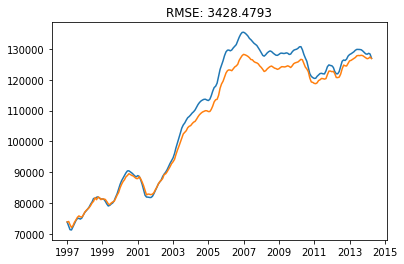

In [38]:
#template
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(hotSeries)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-hotSeries)**2)/len(hotSeries)))

Text(0.5,1,'Hot Springs RMSE: 3428.4793')

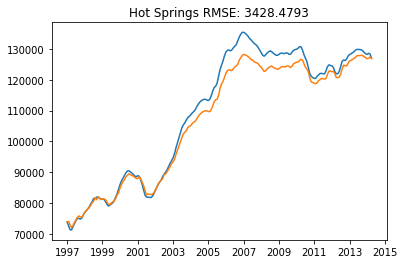

In [456]:
#hot
Hpredictions_ARIMA = np.exp(Hpredictions_ARIMA_log)
plt.plot(hotSeries)
plt.plot(Hpredictions_ARIMA)
plt.title('Hot Springs RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-hotSeries)**2)/len(hotSeries)))

Text(0.5,1,'Little Rock RMSE: 3620.8928')

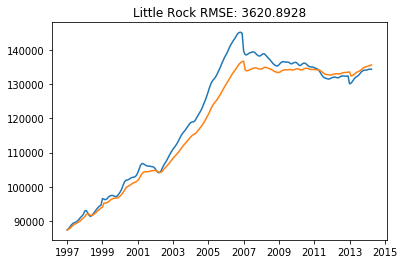

In [457]:
#rock
Rpredictions_ARIMA = np.exp(Rpredictions_ARIMA_log)
plt.plot(rockSeries)
plt.plot(Rpredictions_ARIMA)
plt.title('Little Rock RMSE: %.4f'% np.sqrt(sum((Rpredictions_ARIMA-rockSeries)**2)/len(rockSeries)))

Text(0.5,1,'Fayetteville RMSE: 3268.3343')

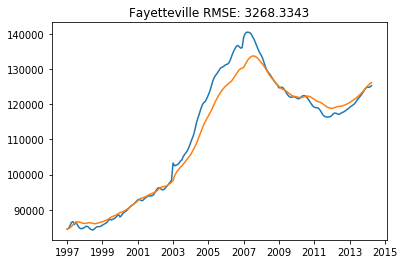

In [458]:
#fay
Fpredictions_ARIMA = np.exp(Fpredictions_ARIMA_log)
plt.plot(faySeries)
plt.plot(Fpredictions_ARIMA)
plt.title('Fayetteville RMSE: %.4f'% np.sqrt(sum((Fpredictions_ARIMA-faySeries)**2)/len(faySeries)))

Text(0.5,1,'Searcy RMSE: 3302.5974')

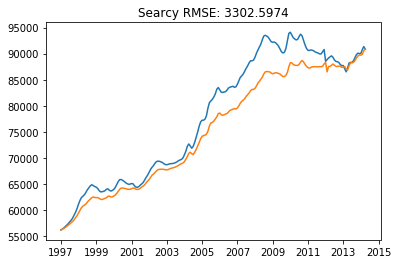

In [459]:
#searcy
Spredictions_ARIMA = np.exp(Spredictions_ARIMA_log)
plt.plot(searcySeries)
plt.plot(Spredictions_ARIMA)
plt.title('Searcy RMSE: %.4f'% np.sqrt(sum((Spredictions_ARIMA-searcySeries)**2)/len(searcySeries)))

In [81]:
Hpredictions_ARIMA.tail()

Date
2013-12-01    127098.192350
2014-01-01    126795.702636
2014-02-01    126933.537827
2014-03-01    127363.081233
2014-04-01    126852.985664
dtype: float64

In [158]:
Rpredictions_ARIMA.tail()

Date
2013-12-01    134988.238345
2014-01-01    135088.190420
2014-02-01    135226.103105
2014-03-01    135412.699443
2014-04-01    135543.203602
dtype: float64

In [159]:
Fpredictions_ARIMA.tail()

Date
2013-12-01    124573.910576
2014-01-01    125079.849136
2014-02-01    125523.482773
2014-03-01    125859.474056
2014-04-01    126139.936979
dtype: float64

In [162]:
Spredictions_ARIMA.tail()

Date
2013-12-01    89747.767194
2014-01-01    89708.560085
2014-02-01    89904.738418
2014-03-01    90572.077292
2014-04-01    90856.866017
dtype: float64

In [167]:
Spredictions_ARIMA.loc['2014-01-01' : '2014-04-01']

Date
2014-01-01    89708.560085
2014-02-01    89904.738418
2014-03-01    90572.077292
2014-04-01    90856.866017
dtype: float64

In [171]:
#RMSE for the test months
Hpred = Hpredictions_ARIMA.loc['2014-01-01' : '2014-03-01']
Hobs = hotSeries['2014-01-01' : '2014-03-01']

Hrmse = np.sqrt(sum((Hpred-Hobs)**2)/len(Hobs))
Hrmse

1369.372263544736

In [172]:
#RMSE for the test months
Rpred = Rpredictions_ARIMA.loc['2014-01-01' : '2014-03-01']
Robs = rockSeries['2014-01-01' : '2014-03-01']

Rrmse = np.sqrt(sum((Rpred-Robs)**2)/len(Robs))
Rrmse

1011.9879678513284

In [173]:
#RMSE for the test months
Fpred = Fpredictions_ARIMA.loc['2014-01-01' : '2014-03-01']
Fobs = faySeries['2014-01-01' : '2014-03-01']

Frmse = np.sqrt(sum((Fpred-Fobs)**2)/len(Fobs))
Frmse

695.5246359597272

In [175]:
#RMSE for the test months
Spred = Spredictions_ARIMA.loc['2014-01-01' : '2014-03-01']
Sobs = searcySeries['2014-01-01' : '2014-03-01']

Srmse = np.sqrt(sum((Spred-Sobs)**2)/len(Sobs))
Srmse

737.4229161949501

In [455]:
print(Hrmse)
print(Rrmse)
print(Frmse)
print(Srmse)

1369.372263544736
1011.9879678513284
695.5246359597272
737.4229161949501


In [300]:
hotC = pd.read_csv("hotMean.csv")
rockC = pd.read_csv("rockMean.csv")
fayC = pd.read_csv("fayMean.csv")
searcyC = pd.read_csv("searcyMean.csv")

In [278]:
hotC.columns

Index(['Zip', 'Pop', 'MalePop', 'FemalePop', 'WhitePop', 'BlackPop',
       'OtherPop', 'Households', 'FamilyHouseholds', 'NonfamilyHouseholds',
       'AvgHouseholdSize', 'AvgFamilySize', 'TotalHousing', 'OccupiedHousing',
       'VacantHousing', 'HomeownerVacancyRate', 'RentalVacancyRate',
       'MedianIncomeHousehold', 'PriceTest', 'PriceTrain'],
      dtype='object')

Text(0.5,1,'Hot Springs Correlation Matrix')

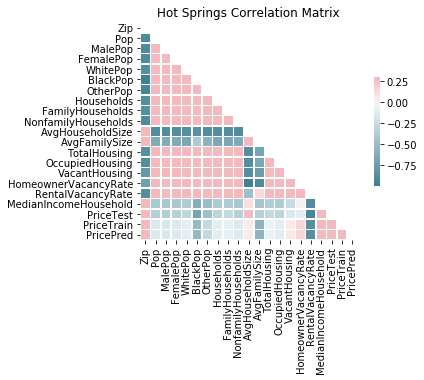

In [466]:
corr = hotC.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Hot Springs Correlation Matrix")

Text(0.5,1,'Little Rock Correlation Matrix')

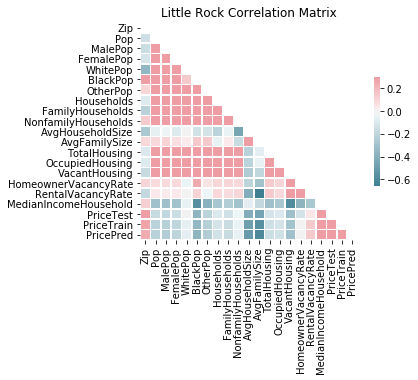

In [467]:
corr = rockC.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Little Rock Correlation Matrix")

Text(0.5,1,'Fayetteville Correlation Matrix')

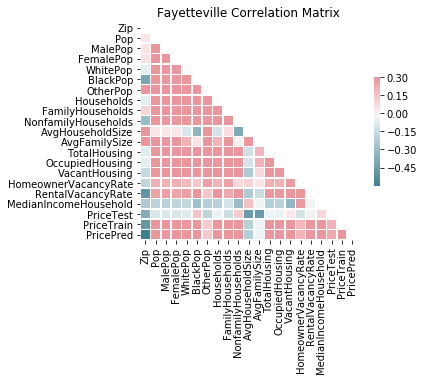

In [468]:
corr = fayC.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Fayetteville Correlation Matrix")

Text(0.5,1,'Searcy Correlation Matrix')

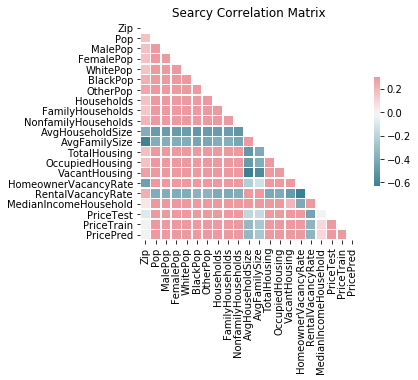

In [470]:
corr = searcyC.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Searcy Correlation Matrix")

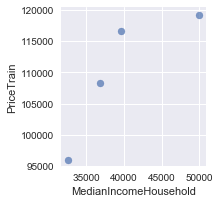

In [478]:
sns.set(style="darkgrid")

g = sns.FacetGrid(hotC)
g.map(plt.scatter, "MedianIncomeHousehold", "PriceTrain", alpha=.7)
g.add_legend();
plt.show()

In [ ]:
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

Text(0.5,1,'Hot Springs Median Income by Price')

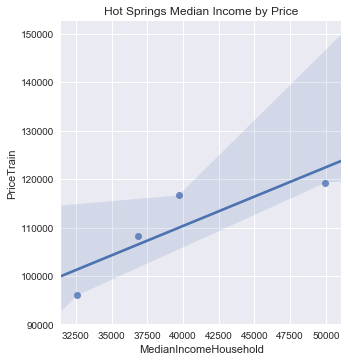

In [480]:
sns.lmplot(x='MedianIncomeHousehold',y='PriceTrain',data=hotC,fit_reg=True) 
plt.title("Hot Springs Median Income by Price")

Text(0.5,1,'Little Rock Median Income by Price')

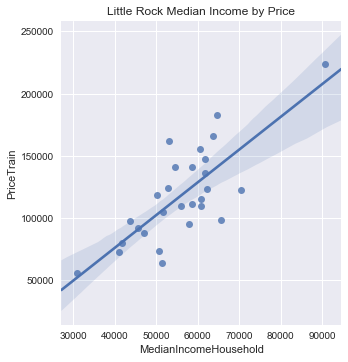

In [482]:
sns.lmplot(x='MedianIncomeHousehold',y='PriceTrain',data=rockC,fit_reg=True) 
plt.title("Little Rock Median Income by Price")

Text(0.5,1,'Fayetteville Median Income by Price')

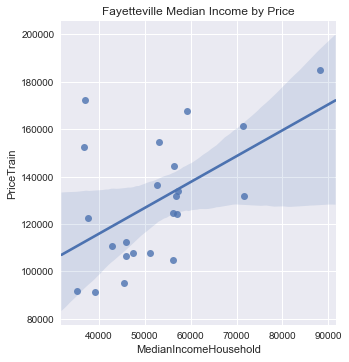

In [483]:
sns.lmplot(x='MedianIncomeHousehold',y='PriceTrain',data=fayC,fit_reg=True) 
plt.title("Fayetteville Median Income by Price")

Text(0.5,1,'Searcy Median Income by Price')

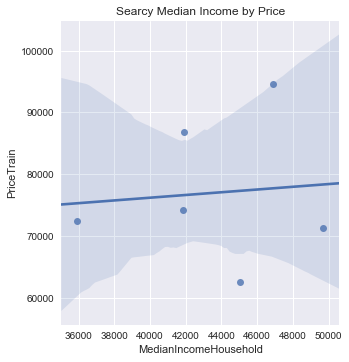

In [484]:
sns.lmplot(x='MedianIncomeHousehold',y='PriceTrain',data=searcyC,fit_reg=True) 
plt.title("Searcy Median Income by Price")

In [ ]:
#ARIMA - searcy lower rmse than fayetteville
#to predict 2014, expand to 2014 (avoid out of sample forecast)
#including 2014
#take the 3 2014 months and calculate RMSE for this 
